In [6]:
import pandas as pd  # noqa
from matplotlib import pyplot as plt  # noqa

In [58]:
df = pd.read_pickle("hw1_taxi_task1_results.pickle")

In [59]:
df.shape

(24500, 5)

In [60]:
df.head()

,q_param,trajectory_len,trajectory_n,iteration_n,mean_total_rewards
epoch,,,,,
0.0,90.0,100.0,400.0,20.0,-391.18
1.0,90.0,100.0,400.0,20.0,-325.12
2.0,90.0,100.0,400.0,20.0,-263.81
3.0,90.0,100.0,400.0,20.0,-247.10
4.0,90.0,100.0,400.0,20.0,-236.72


In [61]:
df.describe()

,q_param,trajectory_len,trajectory_n,iteration_n,mean_total_rewards
count,24500.000000,24500.000000,24500.000000,24500.000000,24500.000000
mean,70.000000,1214.285714,1214.285714,30.000000,-174.313740
std,14.142424,1283.357316,1283.357316,10.000204,219.679464
min,50.000000,100.000000,100.000000,10.000000,-836.570000
25%,60.000000,200.000000,200.000000,20.000000,-278.135000
50%,70.000000,800.000000,800.000000,30.000000,-80.005000
75%,80.000000,2000.000000,2000.000000,40.000000,2.220000
max,90.000000,4000.000000,4000.000000,40.000000,8.010000


In [ ]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")

axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")

axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")

axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")

plt.show()

In [ ]:
plt.plot(X, y, color="r", label="sin")
plt.plot(X, z, color="g", label="cos")

plt.xlabel("Angle")
plt.ylabel("Magnitude")
plt.title("Sine and Cosine functions")

plt.legend()

plt.show()

Find trajectory with max mean_total_rewards

Max mean total rewards of 8.01 achieved with parameters:
	quantile = 0.5
	trajectory_len = 200.0
	trajectory_n = 4000.0
	iteration_n = 40.0


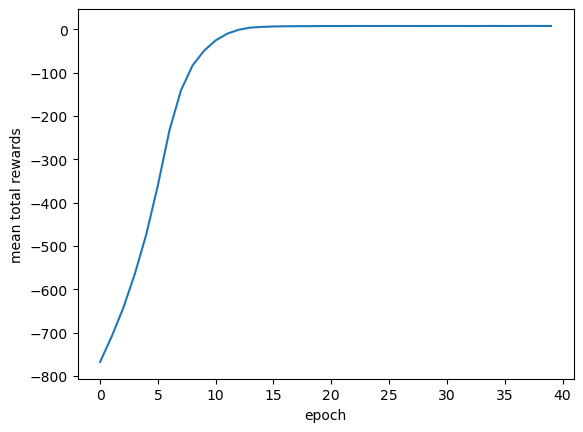

In [163]:
trajectories_list = [100, 200, 400, 800, 1000, 2000, 4000]
iteration_list = [10, 20, 30, 40]
quantile_list = [50, 60, 70, 80, 90]

# find trajectory with max mean_total_rewards
max_value_idx = df["mean_total_rewards"].idxmax(axis=0).tolist()
tmp = df.loc[max_value_idx].mean_total_rewards.tolist()
max_traj_idx = tmp.index(max(tmp))
q_max, traj_len_max, traj_n_max, iter_n_max, rewards_max = (
    df.loc[max_value_idx].iloc[max_traj_idx].tolist()
)
print(f"Max mean total rewards of {rewards_max} achieved with parameters:")
print(f"\tquantile = {q_max / 100}\n\ttrajectory_len = {traj_len_max}")
print(f"\ttrajectory_n = {traj_n_max}\n\titeration_n = {iter_n_max}")

df[
    (df.q_param == q_max)
    & (df.trajectory_len == traj_len_max)
    & (df.trajectory_n == traj_n_max)
    & (df.iteration_n == iter_n_max)
].mean_total_rewards.plot()
plt.xlabel("epoch")
plt.ylabel("mean total rewards")
plt.show()

How mean rewards depend on trajectory length (trajectory_len)

In [ ]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")

axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")

axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")

axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")

plt.show()

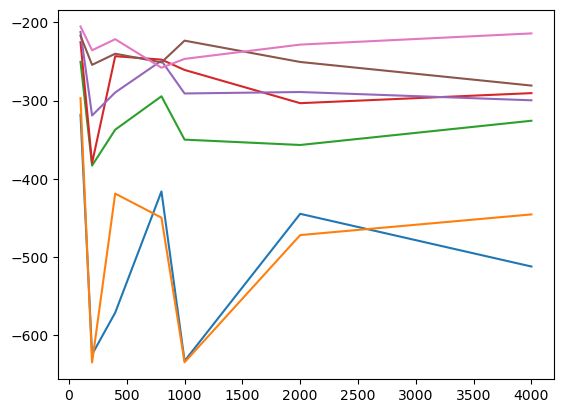

In [186]:
for trajectory_n in trajectories_list:
    cur_data = (
        df[
            (df.q_param == 90)
            & (df.trajectory_n == trajectory_n)
            & (df.iteration_n == 40)
        ]
        .loc[2][["trajectory_len", "mean_total_rewards"]]
        .sort_values("trajectory_len")[["trajectory_len", "mean_total_rewards"]]
    )
    plt.plot(cur_data["trajectory_len"], cur_data["mean_total_rewards"])
plt.show()

In [ ]:
for trajectory_n in trajectories_list:
    for q_param in quantile_list:
        df[
            (df.q_param == q_param)
            & (df.trajectory_len == 1000)
            & (df.trajectory_n == trajectory_n)
            & (df.iteration_n == 40)
        ].plot(x="", y="mean_total_rewards")

How mean rewards depend on number of epochs (iteration_n)

In [ ]:
figure, axis = plt.subplots(3, 2)

axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("q_param = 0.5")

axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("q_param = 0.6")

axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("q_param = 0.7")

axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("q_param = 0.8")

axis[2, 0].plot(X, Y4)
axis[2, 0].set_title("q_param = 0.9")

plt.show()

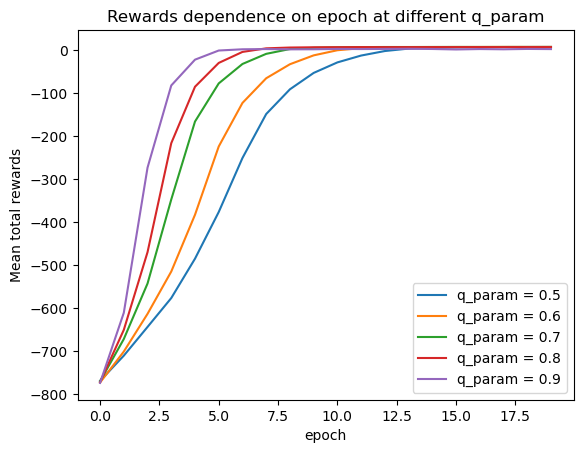

In [204]:
for q_param in quantile_list:
    df[
        (df.q_param == q_param)
        & (df.trajectory_len == 4000)
        & (df.trajectory_n == 4000)
        & (df.iteration_n == 20)
    ].mean_total_rewards.plot(label=f"q_param = {q_param / 100}")
plt.title("Rewards dependence on epoch at different q_param")
plt.xlabel("epoch")
plt.ylabel("Mean total rewards")
plt.legend()
plt.show()

In [212]:
df[
    (df.q_param == 60)
    # & (df.trajectory_len == 4000)
    # & (df.trajectory_n == 4000)
    & (df.iteration_n == 40)
].mean_total_rewards.max()

np.float64(7.92)

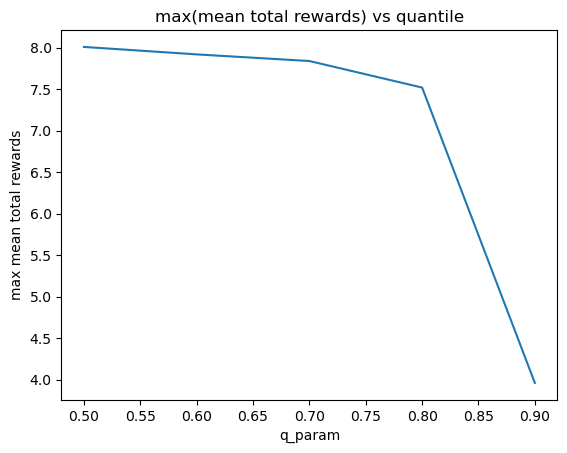

In [230]:
data_list = []
for q_param in quantile_list:
    data_list.append(
        df[
            (df.q_param == q_param)
            # & (df.trajectory_len == 4000)
            # & (df.trajectory_n == 4000)
            & (df.iteration_n == 40)
        ]
        .mean_total_rewards.max()
        .tolist()
    )
plt.plot([x / 100 for x in quantile_list], data_list)
plt.xlabel("q_param")
plt.ylabel("max mean total rewards")
plt.title("max(mean total rewards) vs quantile")
plt.show()

In [ ]:
for q_param in quantile_list:
    df[
        (df.q_param == q_param)
        & (df.trajectory_len == 4000)
        & (df.trajectory_n == 4000)
        & (df.iteration_n == 20)
    ].mean_total_rewards.plot(label=f"q_param = {q_param / 100}")
plt.title("Rewards dependence on epoch at different q_param")
plt.xlabel("epoch")
plt.ylabel("Mean total rewards")
plt.legend()
plt.show()

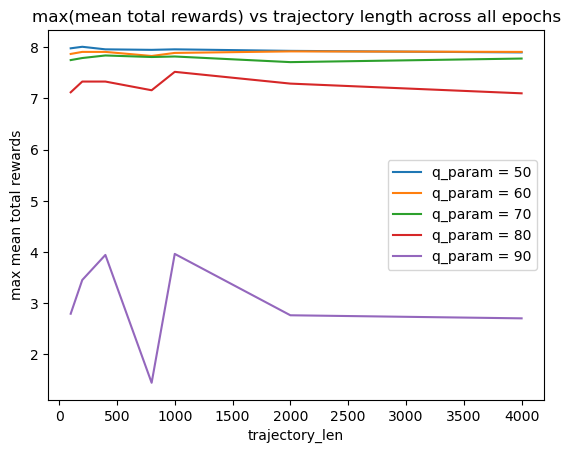

In [234]:
for q_param in quantile_list:
    data_list = []
    for trajectory_len in trajectories_list:
        data_list.append(
            df[
                (df.q_param == q_param)
                & (df.trajectory_len == trajectory_len)
                # & (df.trajectory_n == 4000)
                & (df.iteration_n == 40)
            ]
            .mean_total_rewards.max()
            .tolist()
        )
    plt.plot(trajectories_list, data_list, label=f"q_param = {q_param}")

plt.xlabel("trajectory_len")
plt.ylabel("max mean total rewards")
plt.legend()
plt.title("max(mean total rewards) vs trajectory length across all epochs")
plt.show()

In [ ]:
for q_param in quantile_list:
    data_list = []
    for trajectory_n in trajectories_list:
        data_list.append(
            df[
                (df.q_param == q_param)
                # & (df.trajectory_len == trajectory_len)
                & (df.trajectory_n == trajectory_n)
                & (df.iteration_n == 40)
            ]
            .mean_total_rewards.max()
            .tolist()
        )
    plt.plot(trajectories_list, data_list, label=f"q_param = {q_param}")

plt.xlabel("trajectory_n")
plt.ylabel("max mean total rewards")
plt.legend()
plt.title("max(mean total rewards) vs trajectory_n across all epochs")
plt.show()

In [223]:
data_list

[8.01, 7.92, 7.84, 7.52, 3.96]

In [ ]:
for q_param in quantile_list:
    df[
        (df.q_param == q_param)
        & (df.trajectory_len == 4000)
        & (df.trajectory_n == 4000)
        & (df.iteration_n == 20)
    ].mean_total_rewards.plot(label=f"q_param = {q_param / 100}")
plt.title("Rewards dependence on epoch at different q_param")
plt.xlabel("epoch")
plt.ylabel("Mean total rewards")
plt.legend()
plt.show()

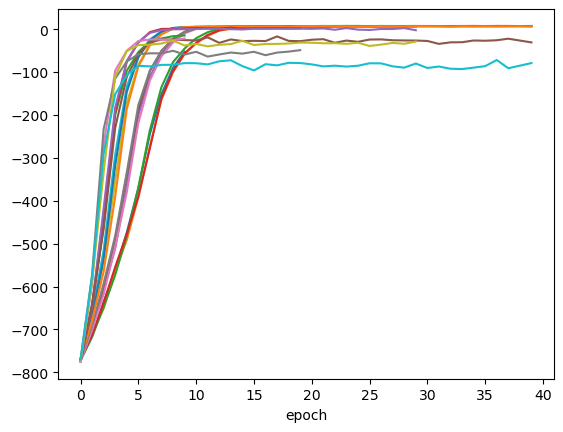

In [194]:
for q_param in quantile_list:
    for iteration_n in iteration_list:
        df[
            (df.q_param == q_param)
            & (df.trajectory_len == 1000)
            & (df.trajectory_n == 1000)
            & (df.iteration_n == iteration_n)
        ].mean_total_rewards.plot()

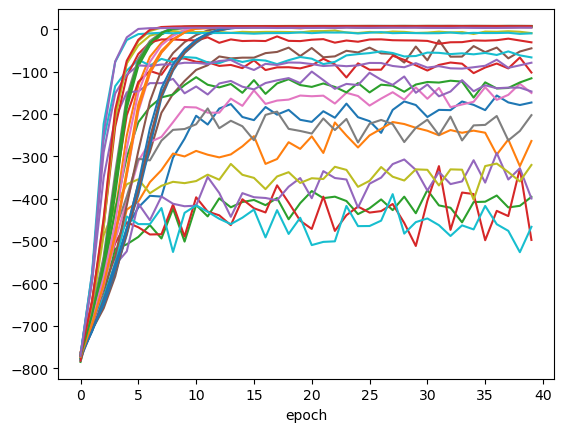

In [162]:
for trajectory_n in trajectories_list:
    for q_param in quantile_list:
        df[
            (df.q_param == q_param)
            & (df.trajectory_len == 1000)
            & (df.trajectory_n == trajectory_n)
            & (df.iteration_n == 40)
        ].mean_total_rewards.plot()

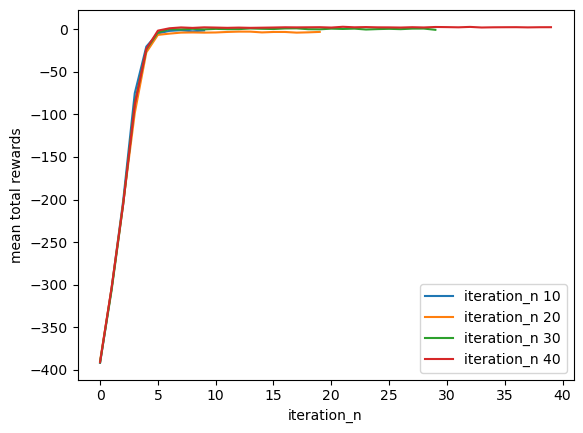

In [158]:
for iteration_n in iteration_list:
    plt.plot(
        df[
            (df.q_param == q_param)
            & (df.trajectory_len == 100)
            & (df.trajectory_n == 4000)
            & (df.iteration_n == iteration_n)
        ].mean_total_rewards,
        label=f"iteration_n {iteration_n}",
    )
plt.xlabel("iteration_n")
plt.ylabel("mean total rewards")
plt.legend()

How mean rewards depend on quantile 

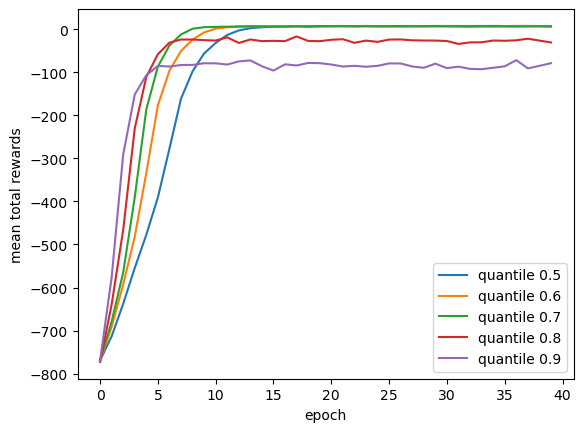

In [150]:
for q_param in [50, 60, 70, 80, 90]:
    plt.plot(
        df[
            (df.q_param == q_param)
            & (df.trajectory_len == 1000)
            & (df.trajectory_n == 1000)
            & (df.iteration_n == 40)
        ].mean_total_rewards,
        label=f"quantile {q_param / 100}",
    )
plt.xlabel("epoch")
plt.ylabel("mean total rewards")
plt.legend()

<Axes: xlabel='epoch'>

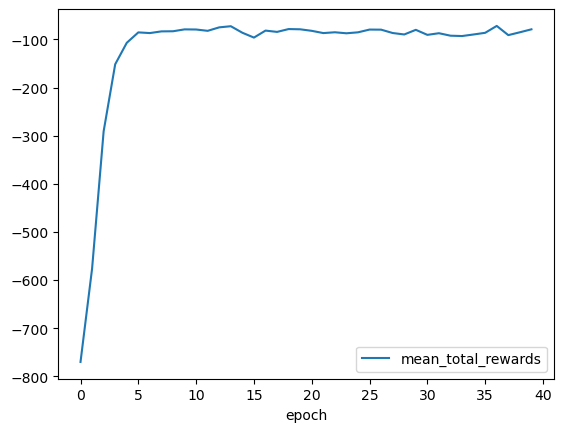

In [87]:
df[
    (df.q_param == 90)
    & (df.trajectory_len == 1000)
    & (df.trajectory_n == 1000)
    & (df.iteration_n == 40)
].plot(y="mean_total_rewards")

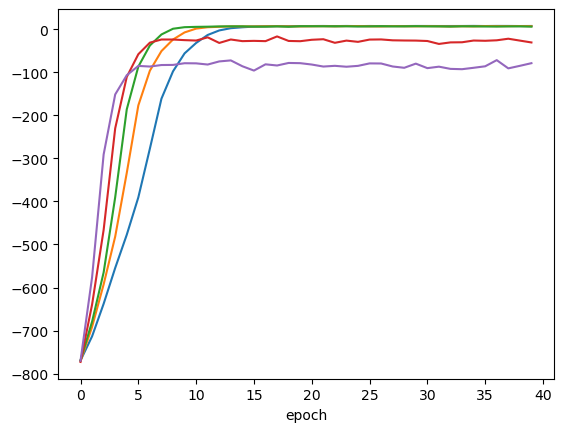

In [84]:
for q in [50, 60, 70, 80, 90]:
    df[
        (df.q_param == q)
        & (df.trajectory_len == 1000)
        & (df.trajectory_n == 1000)
        & (df.iteration_n == 40)
    ]["mean_total_rewards"].plot()